<a href="https://colab.research.google.com/github/FernyCat/Practica3.4_MD/blob/main/Practica3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

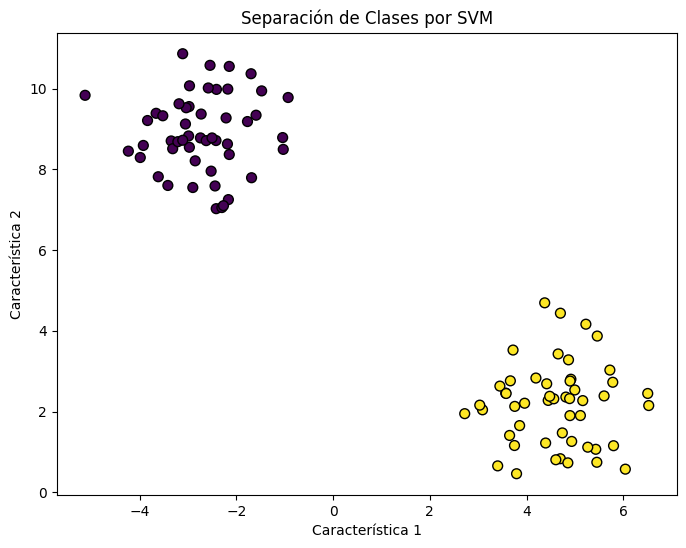

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

class SVM:
    def __init__(self, learning_rate=1e-3, lambda_param=1e-2, n_iters=1000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None


    def _init_weights_bias(self, X):
        n_features = X.shape[1]
        self.w = np.zeros(n_features)
        self.b = 0

    def _get_cls_map(self, y):
        return np.where(y <= 0, -1, 1)

    def _satisfy_constraint(self, x, y):
        condition = y * (np.dot(x, self.w) - self.b) >= 1
        return condition

    def _get_gradients(self, x, y):
        if self._satisfy_constraint(x, y):
            dw = 2 * self.lambda_param * self.w
            db = 0
        else:
            dw = 2 * self.lambda_param * self.w - np.dot(x, y)
            db = -y
        return dw, db

    def _update_weights_bias(self, dw, db):
        self.w -= self.learning_rate * dw
        self.b -= self.learning_rate * db

    def fit(self, X, y):
        self._init_weights_bias(X)
        y = self._get_cls_map(y)

        for _ in range(self.n_iters):
            for i, x in enumerate(X):
                dw, db = self._get_gradients(x, y[i])
                self._update_weights_bias(dw, db)

    def predict(self, X):
        return np.sign(np.dot(X, self.w) - self.b)


# Generar datos de prueba con make_blobs
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=42)

# Crear y entrenar el modelo SVM
model = SVM(n_iters=1000)
model.fit(X, y)

# Visualizar los datos y la separación de clases aprendida por el SVM
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, edgecolors='k')

# Graficar la separación de clases aprendida por el SVM
plt.title('Separación de Clases por SVM')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

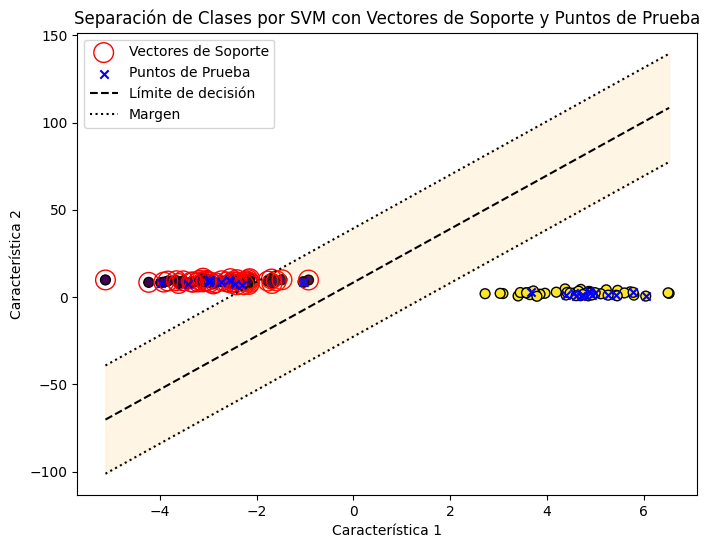

In [ ]:
# Obtener los índices de los vectores de soporte
support_vectors_idx = np.where(y_train * (np.dot(X_train, model.w) - model.b) <= 1)[0]

# Calcular el límite de decisión y el margen de separación
slope = -model.w[0] / model.w[1]
intercept = -model.b / model.w[1]
x_decision_boundary = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
y_decision_boundary = slope * x_decision_boundary + intercept

margin = 1 / np.sqrt(np.sum(model.w ** 2))
y_margin_up = y_decision_boundary + slope * margin
y_margin_down = y_decision_boundary - slope * margin

# Visualizar los datos y la separación de clases aprendida por el SVM
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, edgecolors='k')

# Graficar los vectores de soporte
plt.scatter(X_train[support_vectors_idx, 0], X_train[support_vectors_idx, 1], s=200, facecolors='none', edgecolors='r', label='Vectores de Soporte')

# Graficar los puntos de prueba
plt.scatter(X_test[:, 0], X_test[:, 1], marker='x', c='blue', label='Puntos de Prueba')

# Graficar el límite de decisión y el margen de separación
plt.plot(x_decision_boundary, y_decision_boundary, 'k--', label='Límite de decisión')
plt.plot(x_decision_boundary, y_margin_up, 'k:', label='Margen')
plt.plot(x_decision_boundary, y_margin_down, 'k:')
plt.fill_between(x_decision_boundary, y_margin_up, y_margin_down, alpha=0.1, color='orange')

plt.title('Separación de Clases por SVM con Vectores de Soporte y Puntos de Prueba')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir los datos en entrenamiento y prueba (75%-25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Crear y entrenar el modelo SVM
model = SVM(n_iters=1000)
model.fit(X_train, y_train)

# Calcular la precisión del modelo en el conjunto de prueba
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

y_pred = model.predict(X_test)
acc = accuracy(y_test, y_pred)
print(f'Precisión del modelo en el conjunto de prueba: {acc:.4f}')

Precisión del modelo en el conjunto de prueba: 0.5600
